<a href="https://colab.research.google.com/github/badriadhikari/2019-Fall-AI/blob/master/MODULE-I/Example1_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 1: Binary Classification
* We would like to predict the 'onset of diabetes' based on diagnostic measures (The Pima Indians Diabetes Database) 
* Dataset: [rawdata](https://raw.githubusercontent.com/badriadhikari/2019-Fall-AI/master/MODULE-I/pima-indians-diabetes.data.csv) and [Reference](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

## Step 1: Test libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

Using TensorFlow backend.


## Step 2: Load the data 

In [2]:
# load pima indians dataset
dataset = np.loadtxt("https://raw.githubusercontent.com/badriadhikari/2019-Fall-AI/master/MODULE-I/pima-indians-diabetes.data.csv", delimiter=",")
print(dataset.shape)

(768, 9)


### Questions:
* How many rows and columns does the data have?
* How to load a dataset that has non-numbers?

## Step 3: Preview the first 5 rows
`dataset[0:5, :]` means 'Rows 0 to 4 with all columns'

In [3]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

print(dataset[0:5, :])

[[6.00 148.00 72.00 35.00 0.00 33.60 0.63 50.00 1.00]
 [1.00 85.00 66.00 29.00 0.00 26.60 0.35 31.00 0.00]
 [8.00 183.00 64.00 0.00 0.00 23.30 0.67 32.00 1.00]
 [1.00 89.00 66.00 23.00 94.00 28.10 0.17 21.00 0.00]
 [0.00 137.00 40.00 35.00 168.00 43.10 2.29 33.00 1.00]]


## Step 4: Split into Training/Validation Set
* Training Set (first 700 rows) and Validation Set (remaining 68 rows) 
* The first 8 columns (0 to 7) are our features used as input to the model 
* The last column (8) is the true label (diabetes or not) or the ground truth 

In [0]:
XTRAIN = dataset[:700,0:8]
YTRAIN = dataset[:700,8]
XVALIDATION = dataset[700:,0:8]
YVALIDATION = dataset[700:,8]

### Questions:
* What is our input and output?  
* Why "0:8" in X and "8" in Y?

## Step 5: Normalize (if needed)

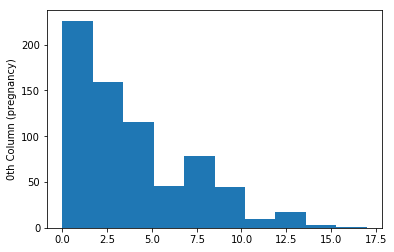

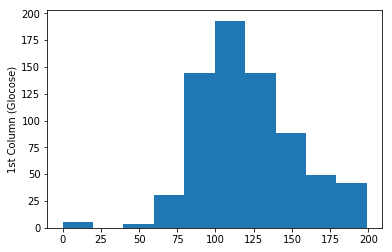

In [5]:
plt.hist(XTRAIN[:, 0])
plt.ylabel('0th Column (pregnancy)')
plt.show()

plt.hist(XTRAIN[:, 1])
plt.ylabel('1st Column (Glocose)')
plt.show()

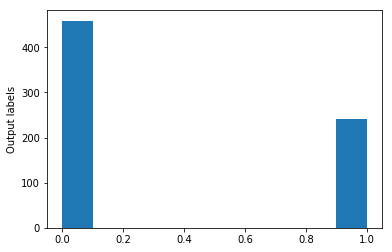

In [6]:
plt.hist(YTRAIN)
plt.ylabel('Output labels')
plt.show()

In [0]:
mean = XTRAIN.mean(axis=0)
XTRAIN -= mean
std = XTRAIN.std(axis=0)
XTRAIN /= std

XVALIDATION -= mean
XVALIDATION /= std

In [8]:
print(mean)
print(std)

[3.83 120.54 68.88 20.38 79.88 31.89 0.48 33.12]
[3.36 32.19 19.53 16.02 115.51 7.94 0.34 11.78]


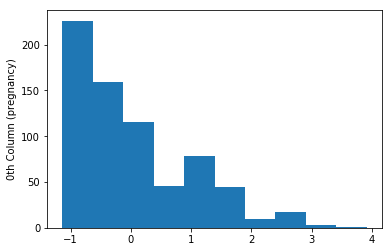

In [9]:
plt.hist(XTRAIN[:, 0])
plt.ylabel('0th Column (pregnancy)')
plt.show()

## Step 6: Review the dimensions of training & validation set
**Also preview some of the "input features" and "correct labels" for the datasets**

In [10]:
print(XTRAIN.shape)
print(YTRAIN.shape)
print(XVALIDATION.shape)
print(YVALIDATION.shape)
print(XTRAIN[0:3,])
print(YTRAIN[0:3])
print(XVALIDATION[0:3,])
print(YVALIDATION[0:3])

(700, 8)
(700,)
(68, 8)
(68,)
[[0.65 0.85 0.16 0.91 -0.69 0.22 0.45 1.43]
 [-0.84 -1.10 -0.15 0.54 -0.69 -0.67 -0.37 -0.18]
 [1.24 1.94 -0.25 -1.27 -0.69 -1.08 0.58 -0.10]]
[1.00 0.00 1.00]
[[-0.54 0.05 0.36 0.41 1.04 0.50 0.02 -0.60]
 [0.65 0.14 0.47 0.66 -0.69 -0.54 0.26 1.35]
 [-0.84 1.47 0.98 0.54 -0.69 0.39 1.27 1.60]]
[0.00 1.00 1.00]


## Step 7: Create a neural network model
A network with 12 neurons in layer 1, 8 neurons in layer 2, and 1 neuron as the last layer

In [11]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


### Questions: 
* Why is `input_dim = 8`?
* Can '8' be replaced with `X[0, :]`?

## Step 8: Compile the model
Check if there are any cycles in the Sequential model

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Step 9: Train the model
* We feed `XTRAIN` into the model and the model calculates errors using `YTRAIN`
* In one epoch the model scans through the entire rows in the `XTRAIN`
* Updating the number of epochs usually increases the accuracy of the model
* To observe the accuracy on the `VALIDATION` data during the training, add `validation_data = (XTEST, YTEST)`

In [13]:
model.fit(XTRAIN, YTRAIN, epochs=15, batch_size=10)


Epoch 1/15
700/700 [==============================] - 0s 418us/step - loss: 0.6701 - acc: 0.6557
Epoch 2/15
700/700 [==============================] - 0s 107us/step - loss: 0.6022 - acc: 0.6914
Epoch 3/15
700/700 [==============================] - 0s 109us/step - loss: 0.5548 - acc: 0.7100
Epoch 4/15
700/700 [==============================] - 0s 113us/step - loss: 0.5220 - acc: 0.7271
Epoch 5/15
700/700 [==============================] - 0s 120us/step - loss: 0.5010 - acc: 0.7486
Epoch 6/15
700/700 [==============================] - 0s 125us/step - loss: 0.4880 - acc: 0.7586
Epoch 7/15
700/700 [==============================] - 0s 121us/step - loss: 0.4790 - acc: 0.7600
Epoch 8/15
700/700 [==============================] - 0s 119us/step - loss: 0.4725 - acc: 0.7686
Epoch 9/15
700/700 [==============================] - 0s 129us/step - loss: 0.4665 - acc: 0.7714
Epoch 10/15
700/700 [==============================] - 0s 142us/step - loss: 0.4625 - acc: 0.7814
Epoch 11/15
700/700 [=======

## Step 10: Evaluate the model on the training data
Yes, the same data we used to train the model

In [14]:
scores = model.evaluate(XTRAIN, YTRAIN)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

700/700 [==============================] - 0s 67us/step
['loss', 'acc']
[0.44608610732214793, 0.7771428571428571]

acc: 77.71%


## Step 11: Evaluate on validation set
* This is a real test of the model
* We will evaluate the model on the "Unknown" dataset (i.e. validation dataset)

In [15]:
scores = model.evaluate(XVALIDATION, YVALIDATION)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 80us/step

acc: 82.35%


## Step 12: Check what what the model actually predicts
* An example of what the model has predicted and comparison with the true classes

In [16]:
print(XVALIDATION[0:5])
print(YVALIDATION[0:5])

[[-0.54 0.05 0.36 0.41 1.04 0.50 0.02 -0.60]
 [0.65 0.14 0.47 0.66 -0.69 -0.54 0.26 1.35]
 [-0.84 1.47 0.98 0.54 -0.69 0.39 1.27 1.60]
 [-0.54 0.26 -3.53 -1.27 -0.69 0.83 -0.51 0.67]
 [0.05 -0.33 0.36 -0.02 0.17 -0.44 -1.06 -0.52]]
[0.00 1.00 1.00 0.00 0.00]


In [0]:
prediction = model.predict(XVALIDATION)

In [18]:
print(prediction[0:5])

[[0.31]
 [0.40]
 [0.80]
 [0.69]
 [0.12]]


In [19]:
print(prediction[0:5].round())

[[0.00]
 [0.00]
 [1.00]
 [1.00]
 [0.00]]


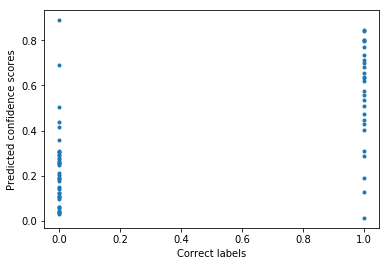

In [20]:
plt.plot(YVALIDATION, prediction, '.')
plt.xlabel('Correct labels')
plt.ylabel('Predicted confidence scores')
plt.show()

## Step 13: Is 'accuracy' sufficient to evaluate our model?
* We can further evaluate the model using precision, recall, and F1-score

In [21]:
accuracy = accuracy_score(YVALIDATION, prediction.round())
precision = precision_score(YVALIDATION, prediction.round())
recall = recall_score(YVALIDATION, prediction.round())
f1score = f1_score(YVALIDATION, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Accuracy: 82.35%
Precision: 85.71%
Recall: 66.67%
F1-score: 0.75


## Step 14: How can the performance be improved?  
* Increase the number of epochs to 100 or 150 
* Add more layers into the neural networks 
* Increase/Decrease the number of rows in the training/validation set